In [1]:
# %matplotlib notebook
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [173]:
from operator import itemgetter

with open('../ranking/log-topcoder-all.txt') as pfile:
    plines = pfile.readlines()
    
    algs = ["CodeForces", "EloR", "EloRX", "Topcoder", "TrueSkill"]
    mapping = {"CodeforcesSystem": 0, "EloRSystem": 1, "EloRXSystem": 2, "TopCoderSystem": 3, "TrueSkillSPBSystem": 4}
    
    metric_names = ['pair-all', 'pair-exp', 'pair-100', 'rank-all', \
                    'rank-exp', 'rank-100', 'entropy-exp', 'time']
    metrics = {}
    for name in metric_names:
        metrics[name] = [{}, {}, {}, {}, {}]
    
    for line in plines:
        try:
            tokens = line.split(' ')
            name = tokens[0]
            rest = ' '.join(tokens[1:])
            
            tokens = rest.split(':')
            params, results = ":".join(tokens[:-1]), tokens[-1]
            
            def extract_numbers(line):
                import re
                res = re.findall(r'[^0-9](\d+\.*\d*)[^0-9]', line)
                return [float(x) for x in res]

            key = tuple(extract_numbers(params))
            vals = extract_numbers(results)
            if len(key) == 0 or len(vals) == 0:
                continue
            
            if name == 'EloRSystem' and len(key) == 2:
                name = 'EloRXSystem'

            alg_id = mapping[name]
            for i in range(6):
                metrics[metric_names[i]][alg_id][key] = vals[i]
            
            idx, best = min(enumerate(vals[6:-1]), key=itemgetter(1))
            metrics['entropy-exp'][alg_id][key] = (best, 200 + 50 * idx)
            metrics['time'][alg_id][key] = vals[-1]
        except:
            pass

In [174]:
from operator import itemgetter

for i in range(len(algs)):
    print("Algorithm type {}:".format(algs[i]))
    for name in metric_names:
        values = metrics[name][i].values()
        if values:
            if 'pair' in name:
                idx, best = max(enumerate(values), key=itemgetter(1))
            else:
                idx, best = min(enumerate(values), key=itemgetter(1))
            print("\tBest {}: {} {}".format(name, best, list(metrics[name][i])[idx]))

Algorithm type CodeForces:
	Best pair-all: 69.808102601087 (100.0, 1.0)
	Best pair-exp: 68.63262888402453 (100.0, 0.5623413251903491)
	Best pair-100: 66.29073744082592 (100.0, 1.0)
	Best rank-all: 20.484685210780626 (100.0, 1.0)
	Best rank-exp: 21.556686623136763 (100.0, 0.5623413251903491)
	Best rank-100: 23.216399357920167 (100.0, 1.0)
	Best entropy-exp: (0.8331155547122829, 450) (260.0, 0.5623413251903491)
	Best time: 1.692 (500.0, 0.31622776601683794)
Algorithm type EloR:
	Best pair-all: 70.07989479854638 (300.0, 40.0, 0.0625)
	Best pair-exp: 69.32789582031326 (300.0, 20.0, 0.00390625)
	Best pair-100: 66.9868930441024 (300.0, 20.0, 0.00390625)
	Best rank-all: 20.306670427539526 (300.0, 40.0, 0.0078125)
	Best rank-exp: 21.12395946837961 (300.0, 20.0, 0.0078125)
	Best rank-100: 22.786280492639968 (300.0, 20.0, 0.00390625)
	Best entropy-exp: (0.8216572514369167, 500) (300.0, 20.0, 0.00390625)
	Best time: 1.847 (400.0, 60.0, 0.125)
Algorithm type EloRX:
	Best pair-all: 69.9502860649324

In [56]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Codeforces
############
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = zip(*list(acc[0].keys()))
z = list(acc[0].values())
ax.scatter(x, y, z)
plt.show()

# From the plot above, it seems like sig_perf has no effect on codeforces

plt.title("CF acc. vs weight")
plt.scatter(y, z)
plt.show()

<IPython.core.display.Javascript object>

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

<IPython.core.display.Javascript object>


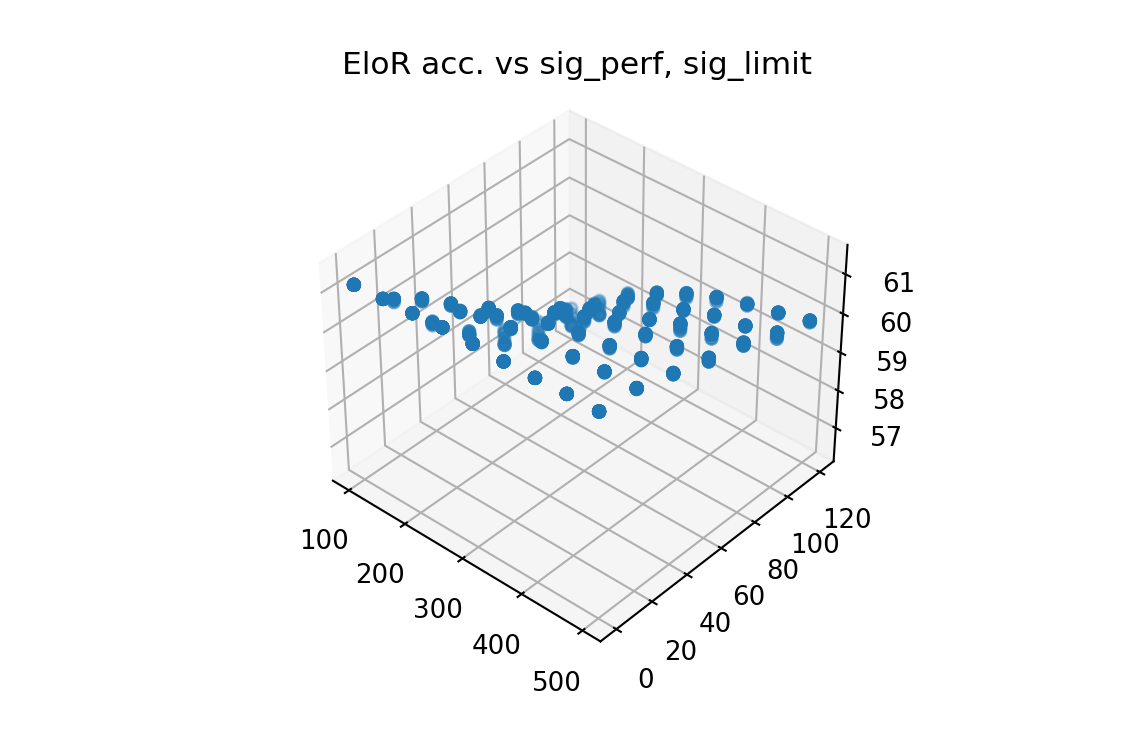

In [60]:
# EloR
######
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, _ = zip(*list(key for key in acc[1].keys() if len(key) == 3))
z = list(val for key, val in acc[1].items() if len(key) == 3)
ax.scatter(x, y, z)
ax.set_title("EloR acc. vs sig_perf, sig_limit")
plt.show()

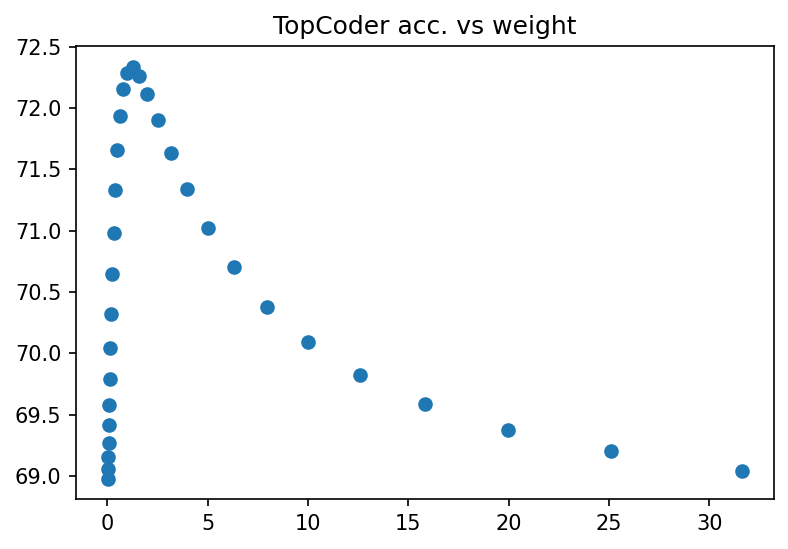

In [6]:
# TopCoder
##########
y = list(acc[2].keys())
z = list(acc[2].values())
plt.scatter(y, z)
plt.title("TopCoder acc. vs weight")
plt.show()

In [126]:
# TrueSkill
###########
eps, beta, _, sigma_growth = zip(*list(metric['pair-exp'][3].keys()))
z = list(acc[3].values())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eps, beta, z)
ax.set_title("TrueSkill acc. vs eps, beta")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(beta, sigma_growth, z)
ax.set_title("TrueSkill acc. vs beta, sigma_growth")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sigma_growth, eps, z)
ax.set_title("TrueSkill acc. vs sigma_growth, eps")
plt.show()

# Seems fairly insensitive to sigma growth

NameError: name 'metric' is not defined

<IPython.core.display.Javascript object>


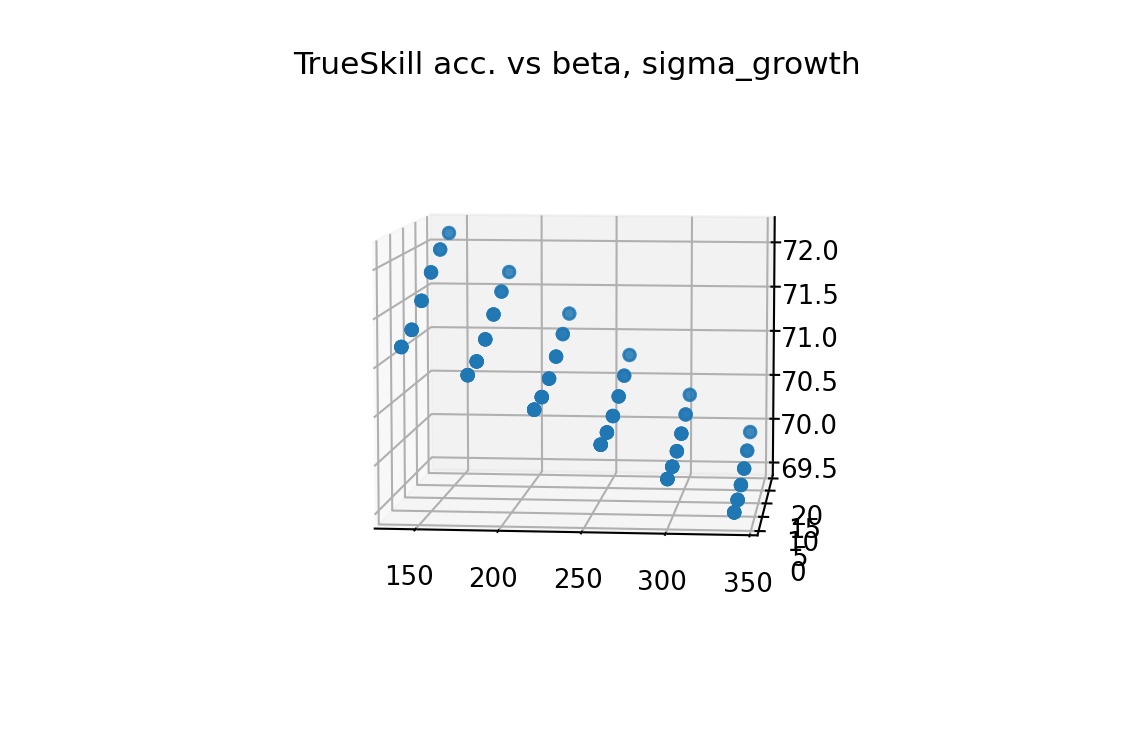

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(beta, sigma_growth, z)
ax.set_title("TrueSkill acc. vs beta, sigma_growth")
plt.show()

[10, 20, 40, 60, 100, 140, 200, 260, 340, 420] [78.51981386411991, 78.84341101677315, 78.98184316226406, 79.0269721718908, 79.06022387710975, 79.0683123349709, 79.09329816394424, 79.11320581375084, 79.12741804654354, 79.13100847299197]
[10, 20, 40, 60, 100, 140, 200, 260, 340, 420] [78.15178245475053, 78.53823445441458, 78.74128406385628, 78.81068730354869, 78.87042733868718, 78.89682333896344, 78.91798605529365, 78.92825615422137, 78.93749737059757, 78.94370091417208]
[10, 20, 40, 60, 100, 140, 200, 260, 340, 420] [78.40886723277569, 78.73087044120328, 78.89391185262748, 78.94925703903759, 78.99542769236811, 79.01428740044503, 79.03002954965449, 79.03620120546367, 79.04346060150345, 79.04758039560508]
[10, 20, 40, 60, 100, 140, 200, 260, 340, 420] [77.99857382083758, 78.15775058474986, 78.12654290078991, 78.10182643268016, 78.0156000981608, 77.9156524322554, 77.78041660643048, 77.67382624293525, 77.5895795741361, 77.52753818635819]


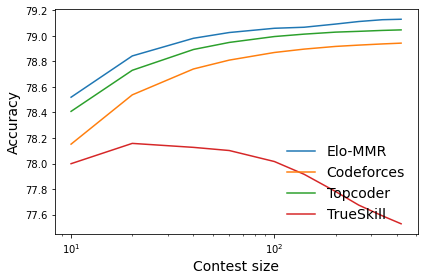

In [32]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

systems = ['mmr', 'cfsys', 'tcsys', 'trueskill']#, 'mmx']
system_name = ['Elo-MMR', 'Codeforces', 'Topcoder', 'TrueSkill']#, 'Elo-MMX']
fig = plt.figure()
for sys, sysname in zip(systems, system_name):
    file = open(f'../size-experiments-{sys}.txt', 'r')
    data = defaultdict(list)
    for line in file:
        if 'size_experiments' in line:
            tokens = line.split()
            split = int(tokens[6][:-1])
            values = eval('(' + ' '.join(tokens[7:-1]))[0]
            data[split].append(values[1])

    x, y = [], []
    for split in data:
        x.append(split)
        y.append(np.mean(data[split]))
    print(x, y)
    plt.plot(x, y, label=sysname)
plt.xlabel("Contest size", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(frameon=False, fontsize=14, loc='lower right')
plt.xscale("log")
plt.savefig('size-vs-accuracy.eps', bbox_inches='tight', dpi = 400)        
plt.tight_layout()
plt.show()